In [1]:
import json
import os

# Specify the file path on your local device
file_path = '/home/lrozinskas/CS128/Data_folder/history/watch-history.json'

# Check if the file exists
if os.path.exists(file_path):
    # Read data from the JSON file
    with open(file_path, 'r', encoding='UTF8') as file:
        history = json.load(file)

    print(f'Loaded history data from {file_path}')
    print(f'Found a total of {len(history)} videos watched')
else:
    print(f'The file {file_path} does not exist.')

Loaded history data from /home/lrozinskas/CS128/Data_folder/history/watch-history.json
Found a total of 9806 videos watched


In [2]:
from assignment5.videos import Video, VideoByChannel
from tqdm import tqdm

videos_watched = [Video(video_data) for video_data in tqdm(history)]

print(f'Parsed {len(videos_watched)} videos')

100%|██████████| 9806/9806 [00:00<00:00, 18276.16it/s]

Parsed 9806 videos


In [3]:
import math

total_time = videos_watched[0].time - videos_watched[-1].time
print(f'Between the time you first watched a video and your last view, {total_time.days} days have passed')
hours = math.floor(total_time.seconds / 3600)
minutes = math.floor((total_time.seconds % 3600) / 60)
seconds = (total_time.seconds % 60)
print(f'{total_time.days} days, {hours} hours, {minutes:.0f} minutes and {seconds} seconds to be exact.')

Between the time you first watched a video and your last view, 1040 days have passed
1040 days, 19 hours, 55 minutes and 21 seconds to be exact.


In [4]:
print(f'On average you watched {len(videos_watched) / total_time.days:.4f} videos per day')

On average you watched 9.4288 videos per day


In [5]:
from collections import Counter
from matplotlib import pyplot as plt

video_counter = Counter(videos_watched)
print(f'You watched a total of {len(video_counter)} unique videos')
print("Your top 20 most watched videos are:")
for video, amount in video_counter.most_common(20):
    print(f'    {amount} views: {video}')

You watched a total of 9070 unique videos
Your top 20 most watched videos are:
    100 views: Watched a video that has been removed by @Unknown
    18 views: Watched https://www.youtube.com/watch?v= by @Unknown
    13 views: Watched Vrbo | A Place For Together - Only Your People | 15s | Combo by @Unknown
    12 views: Watched Dawn Platinum EZ-Squeeze – No Flip, No Mess by @Unknown
    10 views: Watched SwingU - Rangefinder by @Unknown
    6 views: Watched F1_MC2338_vidP_2022Highlights2023Intro_th04_30s_en_none by @Unknown
    6 views: Watched International Fried Foods Taste Test by @Good Mythical Morning
    6 views: Watched International Burger King Taste Test by @Good Mythical Morning
    6 views: Watched F1 2020 Full Season Meme Review by @Dacha44
    5 views: Watched 01-01-introduction.mp4 by @Stanford Dbclass
    5 views: Watched 03 22 Cascade Plat Plus :06 Alt by @Unknown
    5 views: Watched CLS_GOF3D545_EN_FZ捏冰淇淋挖煤解冻热力圈-完整-混剪_1080x1920 by @Unknown
    5 views: Watched Internati

In [7]:
videos_watched_by_channel = [VideoByChannel(video_data) for video_data in tqdm(history)]
channel_counter = Counter(videos_watched_by_channel)
print(f'You watched a total of {len(channel_counter)} unique channels')
print("Your top 40 most watched channels are:")
for video, amount in channel_counter.most_common(40):
    print(f'    {amount} views: {video.channel_name}')

100%|██████████| 9806/9806 [00:00<00:00, 17620.36it/s]

You watched a total of 3529 unique channels
Your top 40 most watched channels are:
    511 views: Good Mythical Morning
    334 views: FORMULA 1
    307 views: ESPN
    226 views: Dude Perfect
    217 views: UNDISPUTED
    155 views: Bob Does Sports
    150 views: CBS Sports Golazo
    138 views: Bhlademyst
    113 views: CashNastyReacts
    98 views: Unknown
    85 views: Shelfy
    84 views: Maryke van der Walt
    83 views: Good Good
    77 views: NBA
    77 views: Telford Work
    76 views: NBA on ESPN
    70 views: Rick Shiels Golf
    67 views: AuzioMF
    65 views: NickRTFM
    62 views: ZwebackHD
    59 views: ChizPlays
    57 views: Sidemen
    53 views: Cody Ko
    52 views: ESPN FC
    48 views: House of Highlights
    47 views: gm__golf
    46 views: NepentheZ 2
    44 views: Tube Golf News
    44 views: McGunski
    42 views: Fuzzy
    39 views: MLB
    39 views: THE RACE
    38 views: NepentheZ
    38 views: Pitstop
    37 views: Jarno Opmeer
    36 views: Muselk
    36 v

You have watched a total of 830 channels more than once:


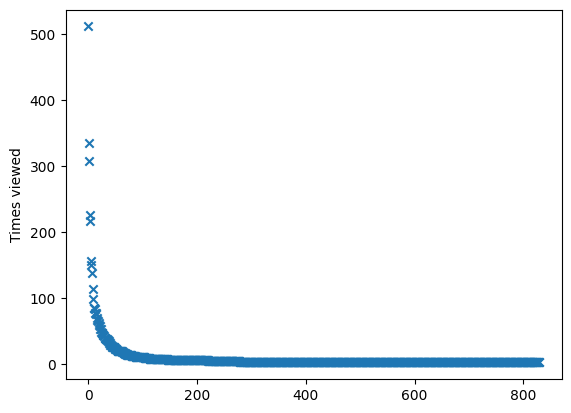

In [8]:
channels_watched_more_than_once = [
    (video, amount) for video, amount in channel_counter.most_common()
    if amount > 1
]

print(f'You have watched a total of {len(channels_watched_more_than_once)} channels more than once:')
plt.scatter(
    range(len(channels_watched_more_than_once)),
    [amount for video, amount in channels_watched_more_than_once],
    marker="x"
)
plt.ylabel("Times viewed")
plt.show()